  # **Problem Statement:**
Design a project from the MNIST dataset to identify digit classification using
 the SVM algorithm.
The link of the Data-set is provided below:
https://drive.google.com/drive/folders/1LaYz-3M1YKeW0R6Pnny_9uXGufjzBRWW?usp=sharing


# **DATA DESCRIPTION:**
MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike[1].

This work using the Support Vector Machine Classifier. Predictor variable uses all pixels as features and uses a label as a target.

## **OBJECTIVE :**
###      To build a model to predict whether the digit written is identified correctly by the Support Vector Machine Algorithm.

# **IDE** :

I am using Google Collaboratory as it is specialized version of jupyter notebook and offers free computing resources, has pre-installed libraries, can be saved on the cloud ,

# **IMPORTING LIBRARIES:**
1. Library **pandas** will be required to work with data in *tabular representation.*
2. Library **numpy** will be required to round the data in the *correlation matrix.*
3. Library **matplotlib, seaborn** will be required for *data visulaization.*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

# **2. DATA-SET LOADING AND DATA CLEANING** :

---
In this block, exploratory data analysis will be carried out , data types , missing values , duplicates , measures of central trend and also the relationship between variables will be described.


**2.1 Import Data-Set**

---



In [ ]:
df=pd.read_csv("/content/digit_svm.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**2.2 Shape of the data:**

---

 

In [ ]:
shape=df.shape
print("There are {} number of Rows and {} Columns  in the dataset.".format(shape[0],shape[1]))

There are 42000 number of Rows and 785 Columns  in the dataset.


# **UNDERSTANDING THE DATA:**
We see it is a  n×m  matrix, with  n=42000  examples (images). Note that the first column 'label' denotes the independent variable column, i.e. the true digit corresponding to the image.

Each images is then encoded in a  m = 785−1 = 784  feature vector, representing the intensity of the pixel. Each element of the vector contains an integer encoding the intensity of a pixel. In other words the original image is decomposed in a  28×28  pixel grid, which is reshaped to be represented as a  28×28=784  column vector.

**2.3 DATA TYPES:**

---

In [ ]:
df.dtypes  #Returns different datatypes for each columns (float,int,bool,string,object etc.)

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [ ]:
df.dtypes.unique()

array([dtype('int64')], dtype=object)

**2.4 BASIC ANALYSIS:**

---



In [ ]:
df.describe().T  # Description of Dataset, basic statistical calculations on numeric columns.

,count,mean,std,min,25%,50%,75%,max
label,42000.0,4.456643,2.887730,0.0,2.0,4.0,7.0,9.0
pixel0,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel1,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel2,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel3,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
pixel779,42000.0,0.002857,0.414264,0.0,0.0,0.0,0.0,62.0
pixel780,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel781,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel782,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.info()  # Returns basic information on all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


**All the columns are of dtype - int64.**

In [ ]:
df.columns # Returns an object with all of the column headers

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

**2.5 MISSING VALUES:**

---



In [ ]:
df.isnull().sum()  # Returns the number of missing value in all column.

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [ ]:
print("Is there any null value in the dataset -> " ,df.isnull().values.any())
print("This means the data contains no missing values or null values.")

Is there any null value in the dataset ->  False
This means the data contains no missing values or null values.


In [ ]:
print("Unique labels : ",np.unique(df['label']))
print("This implies that this dataset contains the digit classification for the digits ranging from 0-9")

Unique labels :  [0 1 2 3 4 5 6 7 8 9]
This implies that this dataset contains the digit classification for the digits ranging from 0-9


In [ ]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


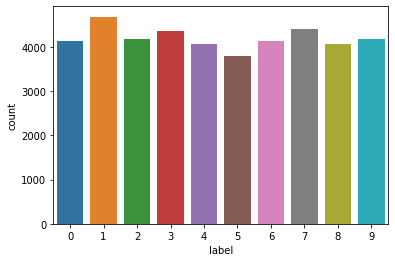

In [ ]:
sns.countplot(df['label'])

Text(0, 0.5, 'Frequency')

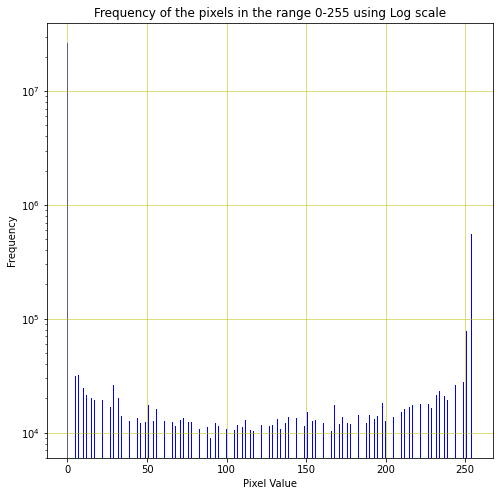

In [ ]:
y=pd.value_counts(df.values.reshape(-1)).sort_index()
N=len(y)
N
x=range(len(y))
x
plt.figure(figsize=[8,8])
plt.bar(x,y,width=0.2,color='blue')
plt.yscale('log')
plt.grid(color='y',linewidth=0.5)
plt.title('Frequency of the pixels in the range 0-255 using Log scale')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


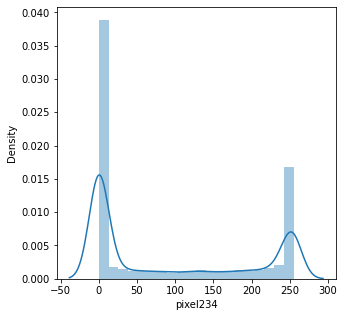

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(df['pixel234'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


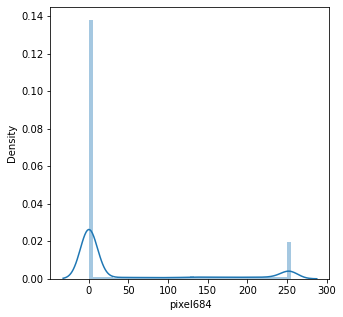

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(df['pixel684'])

Most pixels in the dataset are completely white, along with another set of pixels that are completely dark, with relatively few in between. If we were working with black-and-white photographs (like of faces or landscapes), we might have seen a lot more variety.

**Label VS Pixel:**

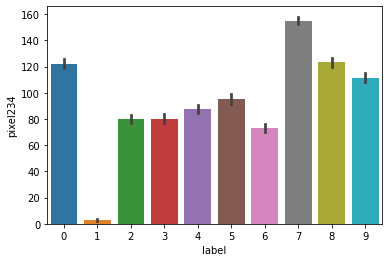

In [ ]:
sns.barplot(x='label',y='pixel234',data=df)

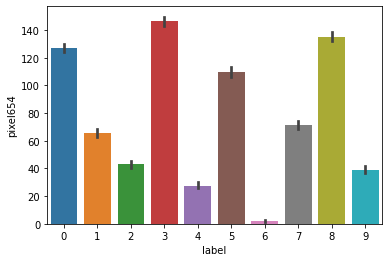

In [ ]:
sns.barplot(x='label',y='pixel654',data=df)

There are **785** columns in the dataset, with the 1st column being the **output column**. So, let's first see how the pixel values look like when plotted. We will use matplotlib for the plotting purposes.

Text(0.5, 1.0, 'Digit-1')

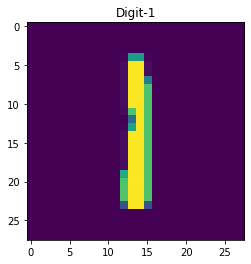

In [ ]:
one=df.iloc[2,1:]
one=one.values.reshape(28,28)
plt.imshow(one)
plt.title('Digit-1')

Text(0.5, 1.0, 'Digit 0')

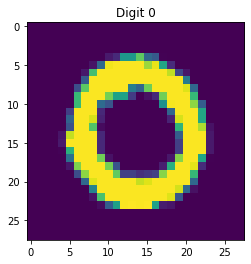

In [ ]:
zero = df.iloc[1, 1:]
zero = zero.values.reshape(28,28)
plt.imshow(zero)
plt.title("Digit 0")

Text(0.5, 1.0, 'Digit 9')

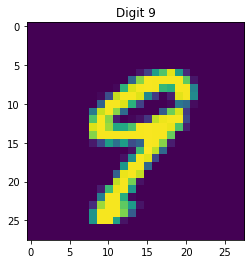

In [ ]:
nine = df.iloc[11, 1:]
nine = nine.values.reshape(28,28)
plt.imshow(nine)
plt.title("Digit 9")

<Figure size 720x720 with 0 Axes>

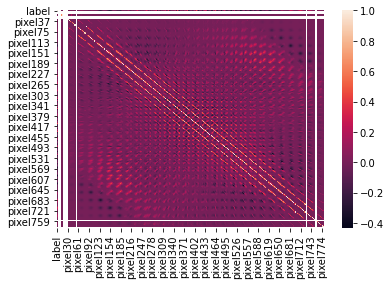

<Figure size 720x720 with 0 Axes>

In [ ]:
sns.heatmap(data=df.corr())
plt.figure(figsize=(10,10))

**Here,by this heatmap we can conclude that almost all nearby pixel are correlated.**

In [ ]:
outcome=pd.crosstab(index=df['label'],columns="count")
print("The following is the total number of data corresponding to the different labels of the numbers:")
outcome

The following is the total number of data corresponding to the different labels of the numbers:


col_0,count
label,
0,4132
1,4684
2,4177
3,4351
4,4072
5,3795
6,4137
7,4401
8,4063


Text(0.5, 1.0, 'Frequency of Labels in the dataset')

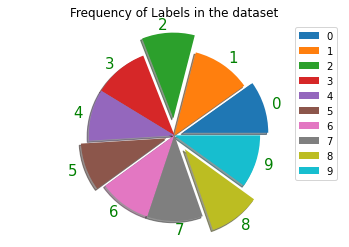

In [ ]:
label=[0,1,2,3,4,5,6,7,8,9]
data=outcome['count'] 
explode = (0.1, 0.0, 0.2, 0.0, 0.0,0.1,0.0,0.0,0.2, 0.0)
plt.pie(data, explode=explode , labels = label,textprops=dict(color='g',size=15),shadow=True)
plt.legend()
plt.axis('equal')
plt.title('Frequency of Labels in the dataset')

In [ ]:
outcome['percent'] = (outcome['count'] / outcome['count'].sum()) * 100
print(outcome)

col_0  count    percent
label                  
0       4132   9.838095
1       4684  11.152381
2       4177   9.945238
3       4351  10.359524
4       4072   9.695238
5       3795   9.035714
6       4137   9.850000
7       4401  10.478571
8       4063   9.673810
9       4188   9.971429


This implies that there is a fairly even distribution for each of the digit in our dataset, which is actually good since there will be no bias to a particular digit. 

# **SPLITTING THE TRAIN AND TEST DATA:**

In [ ]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

# **STANDARDIZE THE DATA:**
This step is to transform the data such that its distribution will have a mean value 0 and standard deviation of 1.
Given the distribution of the data, each value in the dataset will have the sample mean value subtracted, and then divided by the standard deviation of the whole dataset. The average of the pixels varies from 0-140.So, scaling the dataset is needed. We will use sklearn to do this part.

In [ ]:
from sklearn.preprocessing import scale
x_scale=scale(x)

In [ ]:
x_scale.shape

(42000, 784)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.8,train_size=0.2,random_state=101)
print('X_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (8400, 784)
y_train shape: (8400,)
X_test shape: (33600, 784)
y_test shape: (33600,)


In [ ]:
def get_score(model,x_train,x_test,y_train,y_test):
              model.fit(x_train,y_train)
              return model.score(x_test,y_test)

# **SVM MODEL:**
From the classification approach, the goal of SVM is to find a hyperplane in an N-dimensional space that clearly classifies the data points. Thus hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes.


## **Importing the essential library features from sklearn to further implement the algorithmic procedures and checks.**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

Let us define  functions named **confusion_mat and accuracy_sc** for calculating the **confusion matrix** for checking the **accuracy score** of different kernels.

In [ ]:
def confusion_mat(y_test,y_pred):
  return metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
def accuracy_sc(y_test,y_pred):
  return metrics.accuracy_score(y_true=y_test, y_pred=y_pred)

### **USING LINEAR KERNEL:**

---



In [ ]:
model=SVC(kernel='linear')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
print("accuracy:", accuracy_sc(y_test, y_pred)*100, "\n")

# confusion matrix
print(confusion_mat(y_test,y_pred))

accuracy: 91.3125 

[[3188    0   10    5   11   20   32    3   15    1]
 [   0 3677   14   11    5    7    4    8   30    4]
 [  36   29 3027   54   55   10   30   42   48   12]
 [  13   12  104 3051    9  181    5   21   54   25]
 [   8   14   33    2 3057    4   25   31    6  110]
 [  30   23   29  136   44 2622   44   12   72   27]
 [  26   11   44    4   28   33 3113    0   18    0]
 [   7   24   36   19   59    9    2 3210    4  134]
 [  13   46   50  120   21  110   30   18 2843   21]
 [  19   17   21   22  172   20    4  161   26 2893]]


The linear model gives approx. 91.31% accuracy. Let's look at a non-linear model with randomly chosen hyperparameters.

# **Let us try Non- linear models:**

### **USING POLY KERNEL:**

In [ ]:
poly = SVC(kernel='poly')

# fit
poly.fit(x_train, y_train)

# predict
y_pred = poly.predict(x_test)

In [ ]:
print("accuracy:", accuracy_sc(y_test, y_pred)*100, "\n")
  
# confusion matrix
print(confusion_mat(y_test,y_pred))

accuracy: 88.22619047619048 

[[2927    0    9    3   43   11   27    0  262    3]
 [   1 3681   11    2   12    0    6    0   45    2]
 [  15   18 2562   31  152    2   10   23  520   10]
 [   0   16   23 2921   28   40    3   15  387   42]
 [   3    8   14    0 3110    8    4    5   13  125]
 [   6    1    5   68   76 2429   29    7  377   41]
 [  17    8    9    0  101   45 2943    2  152    0]
 [   1   34    8    8  155    1    0 2918   77  302]
 [   3   16    7   29   25   39    3    5 3128   17]
 [   5   11    1   17  166    8    0   41   81 3025]]


The accuracy dropped to 88.22%, so obviously no point in going with polynomial. Let us try 'rbf'.

### **USING RBF KERNEL:**

In [ ]:
non_linear_model = SVC(kernel='rbf')
  
# fit
non_linear_model.fit(x_train, y_train)
 
# predict
y_pred = non_linear_model.predict(x_test)

In [ ]:
print("accuracy:", accuracy_sc(y_test, y_pred)*100, "\n")

# confusion matrix
print(confusion_mat(y_test,y_pred))

accuracy: 93.96130952380952 

[[3195    0   22    6    4    9   32    4   13    0]
 [   0 3690   23   13    7    2    7    6    8    4]
 [  15   14 3146   31   31    5   18   37   41    5]
 [   3    8   96 3192    5   72    6   30   43   20]
 [   3    7   57    1 3095   10   20   24    6   67]
 [  15    9   40   66   15 2780   50   15   31   18]
 [  18    5   48    1   11   31 3149    2   12    0]
 [   6   21   72   11   23    3    0 3284    3   81]
 [  13   24   42   63   14   63   22   19 2994   18]
 [  12   10   42   39   80    6    0   96   24 3046]]


As we clearly see that the non-linear rbf model gives approx. 94% accuracy. And most of the precision is above 90%.

# **Classification report:**

The classification report shows a representation of the main classification metrics on a per-class basis. This gives a deeper intuition of the classifier behavior over global accuracy which can mask functional weaknesses in one class of a multiclass problem. Visual classification reports are used to compare classification models to select models that are “redder”, e.g. have stronger classification metrics or that are more balanced

In [ ]:
#precision, recall and f1-score
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3285
           1       0.97      0.98      0.98      3760
           2       0.88      0.94      0.91      3343
           3       0.93      0.92      0.93      3475
           4       0.94      0.94      0.94      3290
           5       0.93      0.91      0.92      3039
           6       0.95      0.96      0.96      3277
           7       0.93      0.94      0.94      3504
           8       0.94      0.92      0.93      3272
           9       0.93      0.91      0.92      3355

    accuracy                           0.94     33600
   macro avg       0.94      0.94      0.94     33600
weighted avg       0.94      0.94      0.94     33600



# **Hyperparameter Tuning:**

In [ ]:
# set up GridSearchCV()
model_cv = GridSearchCV(SVC(gamma='auto'),{
    'C':[1,10,20],
    'kernel':['rbf','linear']
},cv=5,return_train_score=False)      

 # fit the model
model_cv.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 20], 'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
pd.DataFrame(model_cv.cv_results_)[['param_C','param_kernel','mean_test_score']]


,param_C,param_kernel,mean_test_score
0,1,rbf,0.931429
1,1,linear,0.910595
2,10,rbf,0.938690
3,10,linear,0.910595
4,20,rbf,0.938333
5,20,linear,0.910595


In [ ]:
model_cv.best_score_

0.9386904761904763

In [ ]:
model_cv.best_params_

{'C': 10, 'kernel': 'rbf'}

## **Building and Evaluating the Final Model**

In [ ]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma='auto', kernel="rbf")

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred)*100 , "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 94.75 

[[3207    0   17    2    3   12   30    3    9    2]
 [   0 3694   26    8    6    3    5    8    6    4]
 [  12   10 3177   29   26    5   18   37   22    7]
 [   3    4   88 3235    4   70    2   22   29   18]
 [   4    8   51    1 3111    6   20   22    8   59]
 [  14    6   38   59   14 2812   40   11   29   16]
 [  18    4   48    1   10   19 3164    2   11    0]
 [   5   17   64   13   24    4    2 3312    4   59]
 [   8   12   50   52   12   49   17   17 3043   12]
 [   8    8   42   20   74    9    0   91   22 3081]] 



In [ ]:
# different class-wise accuracy - #precision, recall and f1-score
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3285
           1       0.98      0.98      0.98      3760
           2       0.88      0.95      0.92      3343
           3       0.95      0.93      0.94      3475
           4       0.95      0.95      0.95      3290
           5       0.94      0.93      0.93      3039
           6       0.96      0.97      0.96      3277
           7       0.94      0.95      0.94      3504
           8       0.96      0.93      0.94      3272
           9       0.95      0.92      0.93      3355

    accuracy                           0.95     33600
   macro avg       0.95      0.95      0.95     33600
weighted avg       0.95      0.95      0.95     33600



We see that with Hyperparameter-C = 10 and gamma = auto, we see overall accuracy of the model is 95% and also precision for each label is above 94%.

### **Testing Our Algorithm on Unseen Training:**

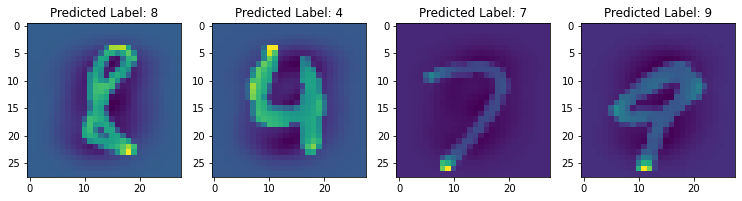

In [ ]:
# Let us visualize our final model on unseen training dataset

df2 = np.random.randint(1,y_pred.shape[0]+1,4)

plt.figure(figsize=(16,4))
for i,j in enumerate(df2):
    plt.subplot(150+i+1)
    d = x_test[j].reshape(28,28)
    plt.title(f'Predicted Label: {y_pred[j]}')
    plt.imshow(d)
plt.show()